### Chicago Taxi Trips Fare Prediction

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from IPython.display import display

%matplotlib inline
plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# import cleaned Taxi Trip data from CSV into DataFrame
%run ./ChicagoRideHailing_DataCleaning.ipynb
df =  df_clean.copy()

df_csv2020 =  pd.read_csv("Taxi_Trips_-_2020.csv", parse_dates=[2,3] , infer_datetime_format=True, date_parser=cached_date_parser)
df_clean2020 =  cleanData(df_csv2020)


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,02fc5d8c3e8525a49b7514bd6c2b3301c2d6aa79,7e179f8ef66ae99ec2d1ec89224e0b7ee5469fe5627f6d...,2021-01-01,2021-01-01 00:15:00,"1,021.00",3.17,nan,nan,nan,4.00,...,0.00,13.25,Cash,Flash Cab,nan,nan,NaN,41.98,-87.69,POINT (-87.6875155152 41.9751709433)
1,33eb5c7a1439ac1e3ec6d1520e21db8137d1d11b,2c508057a94474215bdea7b101edad0dc911ef61bb99e6...,2021-01-01,2021-01-01 15:30:00,"56,047.00",7.10,nan,nan,56.00,nan,...,6.50,27.00,Cash,Flash Cab,41.79,-87.77,POINT (-87.7696154528 41.7925923603),nan,nan,NaN
2,4bcfcfa78f372b705214ee2cba9c765ad6ba5161,31261f6e7fc645eff98c7964c7ea71a0ea7e387a6bd7f8...,2021-01-01,2021-01-01 00:00:00,120.00,0.10,nan,nan,8.00,8.00,...,1.00,4.50,Cash,Taxi Affiliation Services,41.90,-87.63,POINT (-87.6333080367 41.899602111),41.90,-87.63,POINT (-87.6333080367 41.899602111)
3,655bbd9bcb0a78ee003e304ebbe350b21cdd7083,f6138aa35e1fb074eb79fbe29f512b6153dca3593d8cd2...,2021-01-01,2021-01-01 00:00:00,0.00,0.00,nan,nan,67.00,67.00,...,0.00,3.25,Cash,"Taxicab Insurance Agency, LLC",41.78,-87.67,POINT (-87.6665962653 41.7759288274),41.78,-87.67,POINT (-87.6665962653 41.7759288274)
4,7b7b8108de94a518607068a7369ceea1ab2ae924,2c508057a94474215bdea7b101edad0dc911ef61bb99e6...,2021-01-01,2021-01-01 00:00:00,50.00,0.38,nan,nan,60.00,31.00,...,0.00,4.00,Cash,Flash Cab,41.84,-87.65,POINT (-87.6487879519 41.8361501547),41.85,-87.67,POINT (-87.667569312 41.8502663663)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148174 entries, 0 to 2148173
Data columns (total 23 columns):
Trip ID                       object
Taxi ID                       object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                  object
Company                       object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location      object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location    object
dtype

,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tips,Tolls,Extras,Trip Total,Pickup Centroid Latitude,Pickup Centroid Longitude,Dropoff Centroid Latitude,Dropoff Centroid Longitude
count,"2,147,227.00","2,147,899.00","478,730.00","466,153.00","1,977,168.00","1,875,194.00","2,147,950.00","2,147,950.00","2,147,950.00","2,147,950.00","2,147,950.00","1,977,826.00","1,977,826.00","1,883,736.00","1,883,736.00"
mean,"1,150.88",5.72,"17,031,467,870.40","17,031,391,470.96",32.29,25.85,21.07,1.77,0.00,2.04,24.98,41.89,-87.69,41.89,-87.66
std,"1,970.72",11.02,"375,065.14","338,968.19",25.21,21.02,74.00,3.54,0.57,31.43,81.27,0.07,0.10,0.06,0.07
min,0.00,0.00,"17,031,010,100.00","17,031,010,100.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,41.66,-87.91,41.66,-87.91
25%,420.00,0.65,"17,031,081,500.00","17,031,081,403.00",8.00,8.00,7.25,0.00,0.00,0.00,8.75,41.87,-87.70,41.87,-87.66
50%,840.00,2.45,"17,031,320,100.00","17,031,320,100.00",28.00,24.00,14.00,0.00,0.00,0.00,16.50,41.90,-87.64,41.90,-87.64
75%,"1,560.00",9.83,"17,031,843,100.00","17,031,838,200.00",49.00,33.00,30.25,2.05,0.00,1.00,32.00,41.94,-87.63,41.92,-87.63
max,"86,382.00","3,430.53","17,031,980,100.00","17,031,980,100.00",77.00,77.00,"9,900.25",350.00,741.00,"8,255.56","9,975.25",42.02,-87.53,42.02,-87.53


Trip Seconds 99th =  4080.0 , 100th =  86382.0
Trip Miles 99th =  27.3 , 100th =  3430.53
Trip Total 99th =  94.3 , 100th =  9975.25


,Trip ID,Taxi ID,Payment Type,Company,Pickup Centroid Location,Dropoff Centroid Location
count,2148174,2148009,2148174,2148174,1977826,1883736
unique,2148174,1873,8,37,481,551
top,e325b5bcee26fa7d7b64314e4feb0ec3ad706100,8a8b7ea6cf38ddad449d266d38a1c10cf326e0e06f3e7c...,Cash,Flash Cab,POINT (-87.6333080367 41.899602111),POINT (-87.6333080367 41.899602111)
freq,1,6677,918532,658613,300527,259059


Trip ID                             0
Taxi ID                           165
Trip Start Timestamp                0
Trip End Timestamp                406
Trip Seconds                      947
Trip Miles                        275
Pickup Census Tract           1669444
Dropoff Census Tract          1682021
Pickup Community Area          171006
Dropoff Community Area         272980
Fare                              224
Tips                              224
Tolls                             224
Extras                            224
Trip Total                        224
Payment Type                        0
Company                             0
Pickup Centroid Latitude       170348
Pickup Centroid Longitude      170348
Pickup Centroid Location       170348
Dropoff Centroid Latitude      264438
Dropoff Centroid Longitude     264438
Dropoff Centroid  Location     264438
dtype: int64

['Cash',
 'Credit Card',
 'Dispute',
 'Mobile',
 'No Charge',
 'Prcard',
 'Prepaid',
 'Unknown']

Cash           918532
Credit Card    633457
Prcard         261755
Unknown        210754
Mobile         120698
Dispute          1946
No Charge        1028
Prepaid             4
Name: Payment Type, dtype: int64

['24 Seven Taxi',
 '2733 - 74600 Benny Jona',
 '3011 - 66308 JBL Cab Inc.',
 '312 Medallion Management Corp',
 '3556 - 36214 RC Andrews Cab',
 '3591 - 63480 Chuks Cab',
 '3620 - 52292 David K. Cab Corp.',
 '4523 - 79481 Hazel Transit Inc',
 '4623 - 27290 Jay Kim',
 '4732 - Maude Lamy',
 '4787 - 56058 Reny Cab Co',
 '5062 - 34841 Sam Mestas',
 '6743 - 78771 Luhak Corp',
 'Blue Ribbon Taxi Association Inc.',
 'Chicago Carriage Cab Corp',
 'Chicago Independents',
 'Chicago Taxicab',
 'Choice Taxi Association',
 'City Service',
 'Flash Cab',
 'Globe Taxi',
 'KOAM Taxi Association',
 'Medallion Leasin',
 'Metro Jet Cab Association Inc.',
 'Metro Jet Taxi A.',
 'Metro Jet Taxi Ass',
 'Patriot Taxi Dba Peace Taxi Associat',
 'Petani Cab Corp',
 'Setare Inc',
 'Star North Management LLC',
 'Suburban Dispatch LLC',
 'Sun Taxi',
 'Taxi Affiliation Services',
 'Taxicab Insurance Agency, LLC',
 'Top Cab',
 'Top Cab Affiliation',
 'U Taxicab']

Flash Cab                               658613
Taxi Affiliation Services               614381
Medallion Leasin                        130191
Taxicab Insurance Agency, LLC           116418
Sun Taxi                                115100
City Service                             97900
Top Cab Affiliation                      69014
Blue Ribbon Taxi Association Inc.        61534
Chicago Independents                     58197
Star North Management LLC                57376
Globe Taxi                               48758
U Taxicab                                37928
Patriot Taxi Dba Peace Taxi Associat     16888
24 Seven Taxi                            15903
Chicago Taxicab                          12645
Choice Taxi Association                  10515
Setare Inc                                5817
312 Medallion Management Corp             4570
KOAM Taxi Association                     4250
Petani Cab Corp                           2305
3591 - 63480 Chuks Cab                    1473
3556 - 36214 

Initial number of rows : 2148174
Final number of rows : 1797573


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797573 entries, 0 to 2148172
Data columns (total 23 columns):
Trip ID                       object
Taxi ID                       object
Trip Start Timestamp          datetime64[ns]
Trip End Timestamp            datetime64[ns]
Trip Seconds                  float64
Trip Miles                    float64
Pickup Census Tract           float64
Dropoff Census Tract          float64
Pickup Community Area         float64
Dropoff Community Area        float64
Fare                          float64
Tips                          float64
Tolls                         float64
Extras                        float64
Trip Total                    float64
Payment Type                  object
Company                       object
Pickup Centroid Latitude      float64
Pickup Centroid Longitude     float64
Pickup Centroid Location      object
Dropoff Centroid Latitude     float64
Dropoff Centroid Longitude    float64
Dropoff Centroid  Location    object
dtype

#### Base Model

The trip fare is calculated based on the following calculations:

$\text{Fare} = \text{Base Fare} + (\text{Trip Distance} \times \text{Fare Rate per Unit Distance}) + (\text{Trip Time} \times \text{Fare Rate per Unit Time}) $

This is essentially a linear model, and therefore a linear regression will be used as a starting point.

In [4]:
## preparing training and test set

train_X = df_clean2020[['Trip Seconds','Trip Miles']]
train_Y = df_clean2020[['Fare']].values.ravel()

test_X = df_clean[['Trip Seconds','Trip Miles']]
test_Y = df_clean[['Fare']].values.ravel()

In [ ]:
## evaluate learning and prediction for test
def evaluateModel(X,Y,model):
    prediction = model.predict(X)
    
    mse = mean_squared_error(Y,prediction)
    r2 = r2_score(Y,prediction)
    print('RMSE = {0:.2f} USD\n R2 = {1:.4f}'.format(mse**0.5,r2))

In [5]:
# linear model
from sklearn.linear_model import LinearRegression
from  sklearn.metrics import  mean_squared_error, r2_score

linear = LinearRegression().fit(train_X,train_Y)

print('Training')
evaluateModel(train_X,train_Y,linear)
print('Test ')
evaluateModel(test_X,test_Y,linear)

Training
RMSE = 4.93 USD
 R2 = 0.8719
Test 
RMSE = 5.88 USD
 R2 = 0.8644


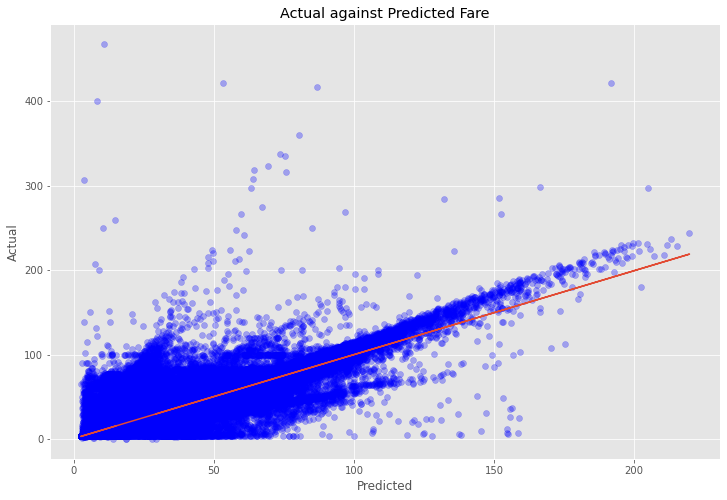

y = 0.99 * x + 0.68


In [42]:
pred_Y = linear.predict(test_X)
m,b = np.polyfit(pred_Y, test_Y, 1)

## plot
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Actual against Predicted Fare')

ax.scatter(pred_Y, test_Y, color = 'blue', alpha = 0.3)
ax.plot(pred_Y, m*pred_Y+b)
plt.show()
print('y = {0:.2f} * x + {1:.2f}'.format(m,b))

In [6]:
## add hour and day of week columns
def expandDateTimeFeatures(df_input):
    df_input['Trip Start Hour'] = df_input['Trip Start Timestamp'].dt.hour
    df_input['Trip Date'] = df_input['Trip Start Timestamp'].dt.date
    df_input['Trip Month'] = df_input['Trip Start Timestamp'].dt.month
    df_input['Trip Day of Week'] = df_input['Trip Start Timestamp'].dt.dayofweek
    
    return df_input

df_clean2020 = expandDateTimeFeatures(df_clean2020)
df_clean = expandDateTimeFeatures(df_clean)


train_X = df_clean2020[['Trip Seconds','Trip Miles','Trip Start Hour','Trip Day of Week','Trip Month']]
test_X = df_clean[['Trip Seconds','Trip Miles','Trip Start Hour','Trip Day of Week','Trip Month']]

# one hot encoding
train_X = pd.get_dummies(train_X, columns = ['Trip Start Hour','Trip Day of Week','Trip Month'], prefix = ['Hour','Day','Month'])
test_X = pd.get_dummies(test_X, columns = ['Trip Start Hour','Trip Day of Week','Trip Month'], prefix = ['Hour','Day','Month'])

#ensure test has same columns
missing_col = [x for x in train_X.columns if x not in test_X.columns]
for col in missing_col : test_X[col] = 0

linear = LinearRegression().fit(train_X,train_Y)

print('Training')
evaluateModel(train_X,train_Y,linear)
print('Test ')
evaluateModel(test_X,test_Y,linear)


Training
RMSE = 4.89 USD
 R2 = 0.8736
Test 
RMSE = 5.80 USD
 R2 = 0.8681


In [7]:
# lasso 
from sklearn.linear_model import Lasso

las = Lasso().fit(train_X,train_Y)

## evaluate learning and prediction for test
print('Training')
evaluateModel(train_X,train_Y,las)
print('Test ')
evaluateModel(test_X,test_Y,las)

Training
RMSE = 4.93 USD
 R2 = 0.8716
Test 
RMSE = 5.88 USD
 R2 = 0.8643


In [12]:
# lasso 
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv = 10, max_iter = 10000)
lasso_cv.fit(train_X,train_Y)

## evaluate learning and prediction for test
print('Training')
evaluateModel(train_X,train_Y,lasso_cv)
print('Test ')
evaluateModel(test_X,test_Y,lasso_cv)

Training
RMSE = 5.34 USD
 R2 = 0.8492
Test 
RMSE = 6.40 USD
 R2 = 0.8395


In [10]:
from xgboost.sklearn import XGBRegressor

### create model with initial parameters 
xgbmodel = XGBRegressor(
        learning_rate = 0.05,
        n_estimators = 500,
        max_depth = 7,
        min_child_weight= 5,
        gamma =0,
        subsample = 0.9,
        colsample_bytree = 0.5,
        scale_pos_weight =1)

## fit model
xgbmodel.fit(train_X,train_Y)

## evaluate learning and prediction for test
print('Training')
evaluateModel(train_X,train_Y,xgbmodel)
print('Test ')
evaluateModel(test_X,test_Y,xgbmodel)

Training
RMSE = 3.10 USD
 R2 = 0.9492
Test 
RMSE = 3.94 USD
 R2 = 0.9392


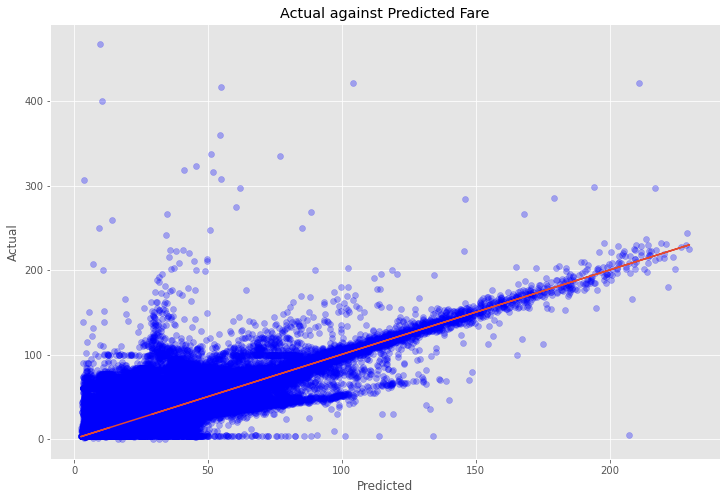

y = 1.00 * x + 0.34


In [22]:
pred_Y = xgbmodel.predict(test_X)
m,b = np.polyfit(pred_Y, test_Y, 1)

## plot
fig, ax = plt.subplots()
fig.set_size_inches(12,8)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Actual against Predicted Fare')

ax.scatter(pred_Y, test_Y, color = 'blue', alpha = 0.3)
ax.plot(pred_Y, m*pred_Y+b)
plt.show()
print('y = {0:.2f} * x + {1:.2f}'.format(m,b))

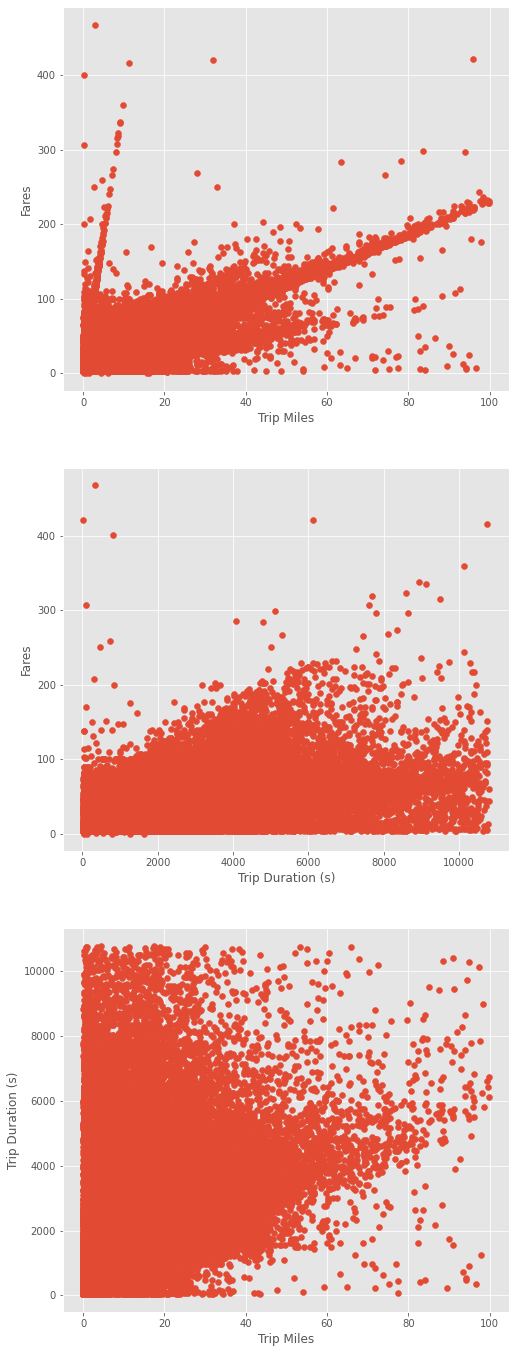

In [41]:

# plot
fig, axs = plt.subplots(3,1)
fig.set_size_inches(8,24)

axs[0].scatter(df_clean['Trip Miles'], df_clean['Fare'])
axs[0].set_xlabel('Trip Miles')
axs[0].set_ylabel('Fares')

axs[1].scatter( df_clean['Trip Seconds'],df_clean['Fare'])
axs[1].set_xlabel('Trip Duration (s)')
axs[1].set_ylabel('Fares')

axs[2].scatter(df_clean['Trip Miles'], df_clean['Trip Seconds'])
axs[2].set_xlabel('Trip Miles')
axs[2].set_ylabel('Trip Duration (s)')

plt.show()
